# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

homeo_method = 'HEH'
tag = 'autoencoder'
matname = tag +'_' + homeo_method

nb_quant = 256
nb_quant = 128
C = 5.
do_double_shuffle = False

record_num_batches = 2**11
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
            homeo_method=homeo_method, eta_homeo=0.05, alpha_homeo=0.02, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)


In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='autoencoder')

Extracting data..loading the data called : data_cache/autoencoder_data
Data is of shape : (81920, 169) - done in 0.30s.


In [5]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    1752863 Feb 12 17:11 data_cache/autoencoder_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1301222 Feb 12 17:37 data_cache/autoencoder_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  110755968 Feb 12 14:59 data_cache/autoencoder_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 169)
average of patches =  -5.346012197420297e-05  +/-  0.006256733979835415
average energy of data =  0.060971410184194344 +/- 0.07082090813368663


In [7]:
l0_sparseness = shl.l0_sparseness
l0_sparseness_noise = shl.n_dictionary #200
#l0_sparseness_high = shl.l0_sparseness * 2
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

loading the dico called : data_cache/autoencoder_HEH_dico.pkl


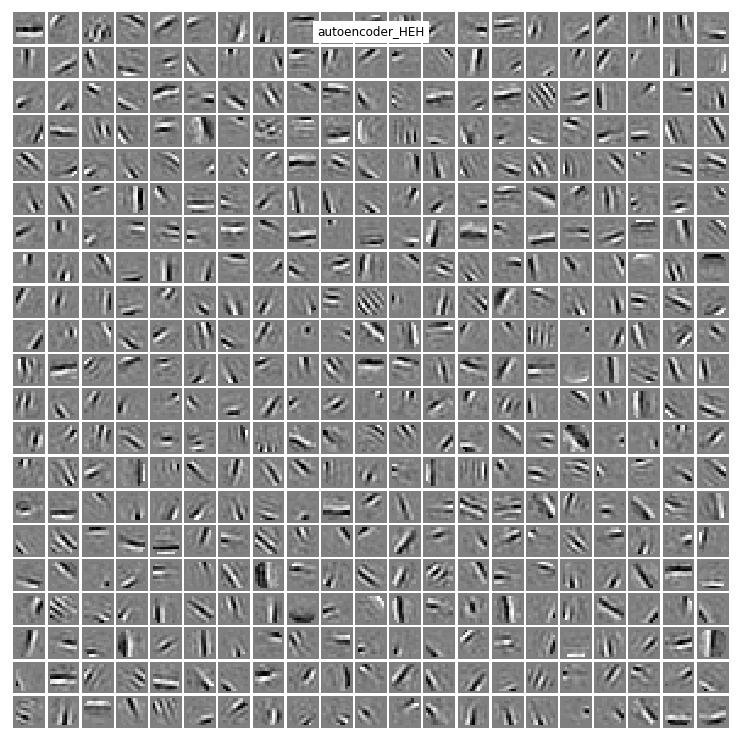

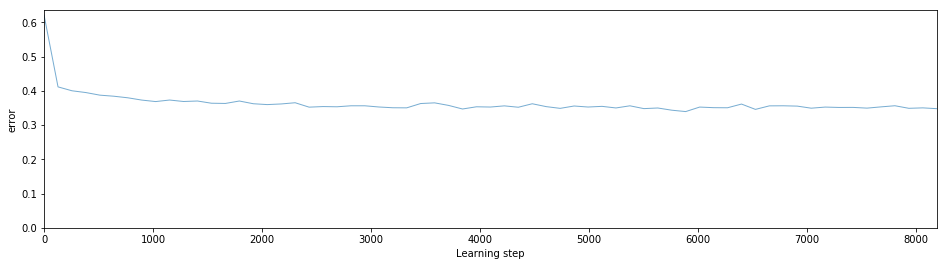

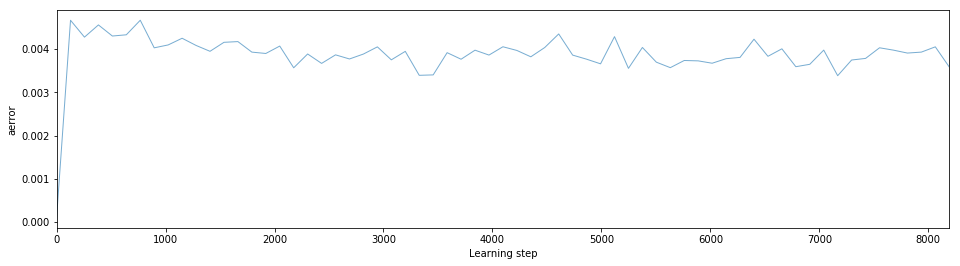

In [8]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_aerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [9]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 169)
average of filters =  0.00010912100067489288 +/- 0.004815870400653991
average energy of filters =  1.0 +/- 8.224293831200726e-17


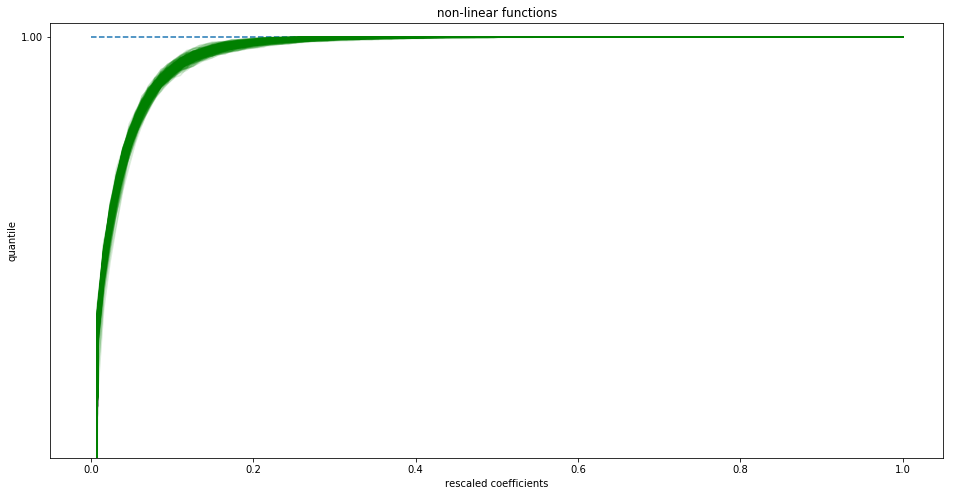

In [10]:
if not dico.P_cum is None: 
    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(dico.P_cum, verbose=False, alpha=.15);
    ax.set_ylim(0.97, 1.001)
    #ax.set_xmargin(0.);

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [11]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 441)
average of codewords =  0.005399920713300282
average std of codewords =  0.05298590069032672
l0-sparseness of codewords =  0.0335375035430839  ~= l0/M = 0.034013605442176874
std of the average of individual patches =  0.0013103026130479199
number of codes, size of reconstructed images =  (2048, 169)


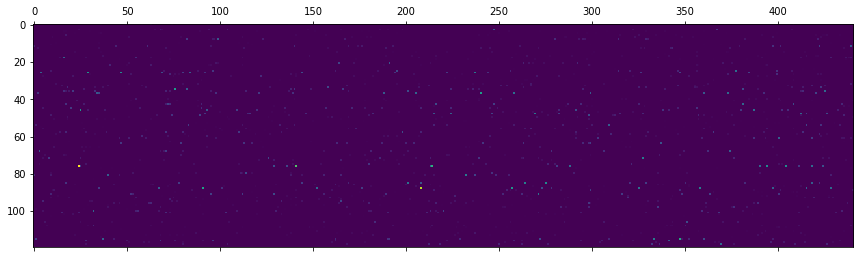

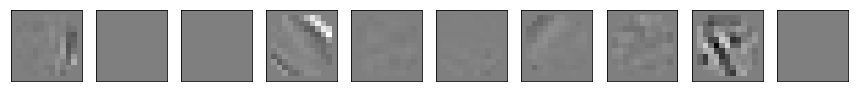

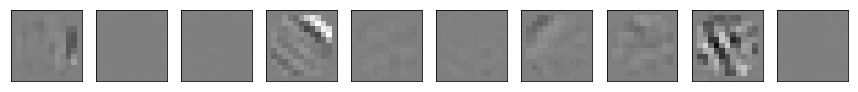

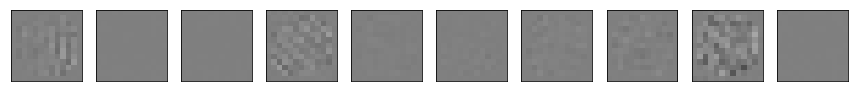

average of data patches =  -1.0042947495150989e-05 +/- 0.005973648630595939
average of residual patches =  -8.912577962733518e-05 +/- 0.003370037654812308
median energy of data =  0.03022854521092207
average energy of data =  0.05903749734484456 +/- 0.07012868733999604
average energy of residual =  0.0207346645228299 +/- 0.02429587873759939
median energy of residual =  0.010849687809864571
average gain of coding =  2.7676686705661635 +/- 0.5604682114304786
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 441)
average of codewords =  0.005399920713300282
average std of codewords =  0.05298590069032673
l0-sparseness of codewords =  0.0335375035430839  ~= l0/M = 0.034013605442176874
std of the average of individual patches =  0.00131030261304792
number of codes, size of reconstructed images =  (2048, 169)


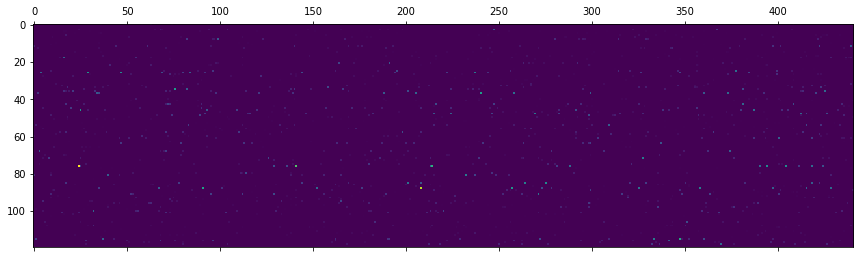

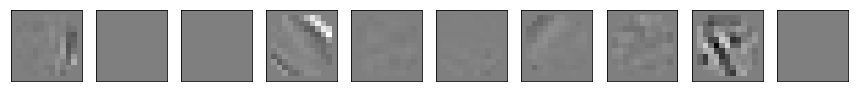

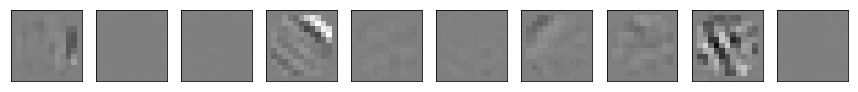

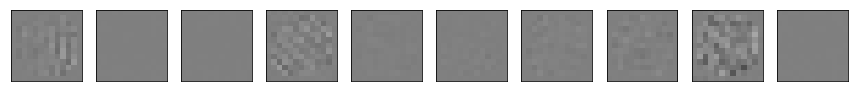

average of data patches =  -1.0042947495150989e-05 +/- 0.005973648630595939
average of residual patches =  -8.912577962733525e-05 +/- 0.003370037654812308
median energy of data =  0.03022854521092207
average energy of data =  0.05903749734484456 +/- 0.07012868733999604
average energy of residual =  0.0207346645228299 +/- 0.02429587873759939
median energy of residual =  0.01084968780986457
average gain of coding =  2.7676686705661635 +/- 0.5604682114304786
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 441)
average of codewords =  0.005405911053939824
average std of codewords =  0.05283924494094331
l0-sparseness of codewords =  0.033544146825396824  ~= l0/M = 0.034013605442176874
std of the average of individual patches =  0.0013527354151425344
number of codes, size of reconstructed images =  (2048, 169)


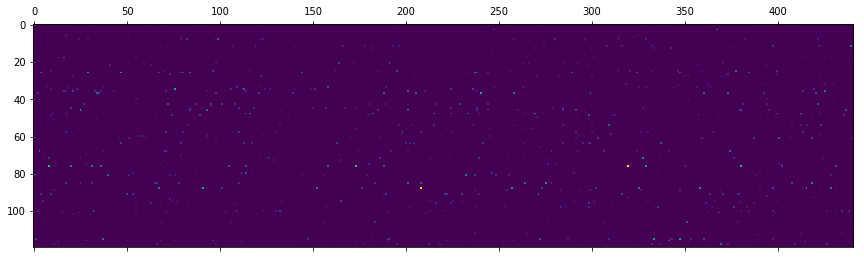

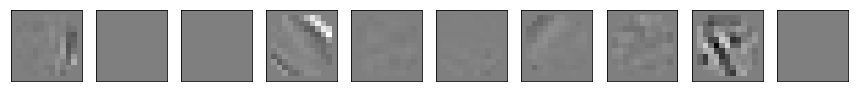

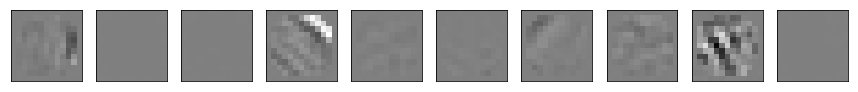

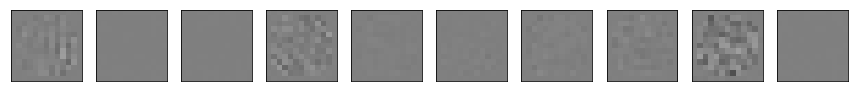

average of data patches =  -1.0042947495150989e-05 +/- 0.005973648630595939
average of residual patches =  -0.0002916735076888915 +/- 0.003775795532195293
median energy of data =  0.03022854521092207
average energy of data =  0.05903749734484456 +/- 0.07012868733999604
average energy of residual =  0.021079098736287695 +/- 0.024652454007180163
median energy of residual =  0.01135186421839947
average gain of coding =  2.7333021773240174 +/- 0.542081146536872


In [12]:
from shl_scripts.shl_encode import mp
if dico.P_cum is None: 
    gain = np.ones(shl.n_dictionary)
else:
    gain = None
for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, gain]):
    print(42*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
    patches = sparse_code @ dico.dictionary
    error = data[indx, :] - patches

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data[indx, :].mean(), '+/-', data[indx, :].mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    #print('average gain of coding = ', data[indx, :].std()/error.std())

## Generating and shuffling the coefficients

In [13]:
sparse_code_bar = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness_noise, 
                 P_cum=dico.P_cum, gain=None)
print(sparse_code_bar.shape)

(2048, 441)


In [14]:
#sparse_code_bar = sparse_code.copy()
np.random.shuffle(sparse_code_bar)

if do_double_shuffle:
    sparse_code_bar = sparse_code_bar.T
    np.random.shuffle(sparse_code_bar)
    sparse_code_bar = sparse_code_bar.T

print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0))
print('average non-zeros', np.count_nonzero(sparse_code, axis=0))

average non-zeros [ 566  653  684  664  688  741  766  742  575  946  664  554  898  428
  597  623  850  974  738  482  720  449  494  672  608  613  524  817
  652  679  676  765  562  827  553  720  975 1043  708  626  652  874
  844  935  572  493  432  511  624  514  640  623  637 1023  332  820
  800  917  817  570  913  574  471  927  525  661  886  527  607  561
  645 1041  677  797 1014  972  719  571  819  651  790  355  625  928
  789  831  794  598  674  843  629  675  657  482  693  720  465  785
  658  373  942  442  760  637  504  630  552  807  538  608  587  645
  613  635  722  682  898  649  888  722  532  671  432  608  574  862
  633  463  810  429  630  646  475  455  538  560  874  751  736  768
  501  527  650  592  704  433  597  376  701  341  833  400  806  587
  698  590  723  533  808  591  732  594  416  615  655  975  591  915
  529  798  492  713  486  526  544  731  585  568 1156  618  528  643
  678  568  786  687  622  914  798  874  528  497  749  69

In [15]:
sparse_code[:N_show, 0], sparse_code_bar[:N_show, 0]

(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.0002, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0374, 0.0001,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0021,
        0.    , 0.3158, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 

In [16]:
print(sparse_code_bar.shape)

(2048, 441)


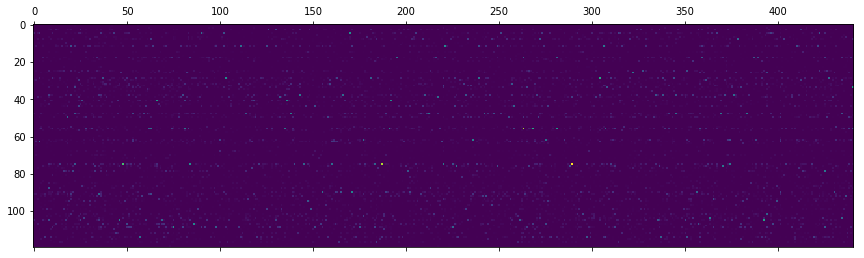

In [17]:
plt.matshow(sparse_code_bar[:N_show, :])

In [18]:
patches_bar = sparse_code_bar @ dico.dictionary

P_cum_rec = dico.P_cum
if dico.P_cum is None: 
    gain_rec = np.ones(shl.n_dictionary)
else:
    gain_rec = None #np.ones(shl.n_dictionary)

sparse_code_rec = mp(patches_bar, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum_rec, gain=gain_rec)

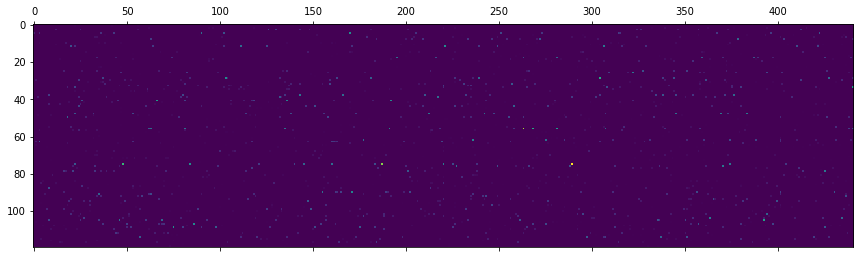

In [19]:
plt.matshow(sparse_code_rec[:N_show, :])

In [20]:
print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)))
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar-sparse_code_rec)))

mean deviation of coefficients =  0.01321846889248853
total deviation of coefficients =  0.008497270576656987


In [21]:
if not dico.P_cum is None: 
    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar, C=C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))

mean deviation of quantiles =  0.02741031243572299
mean deviation of quantiles =  0.005031842489522006
total deviation of quantiles =  0.022998364010463068
ratio deviation of quantiles =  0.8390405641816044


In [22]:
perror = np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
print('proba correct coefficients = ', perror)

proba correct coefficients =  0.7053870376275511


In [24]:
def threshold(sparse_code, l0_sparseness):
    thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=0)
    return (sparse_code>thr)

#print(np.mean( threshold(sparse_code_bar, l0_sparseness)))
#print(np.mean( threshold(sparse_code_rec, l0_sparseness)))
#sparse_code_bar_high = threshold(sparse_code_bar, l0_sparseness_high) * sparse_code_bar
#sparse_code_rec_high = threshold(sparse_code_rec, l0_sparseness) * sparse_code_rec
perror_high = 1 - np.mean( threshold(sparse_code_bar, l0_sparseness) == (sparse_code_rec>0))
print('proba correct coefficients (strong) = ', perror_high)

proba correct coefficients (strong) =  0.9598037131519275


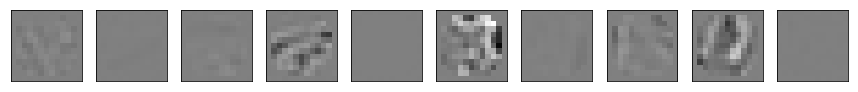

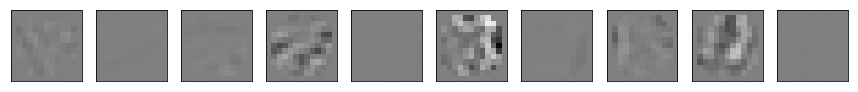

average of data patches =  -9.415794139938642e-05 +/- 0.005949097059120005
average of residual patches =  -0.00035082775109923447 +/- 0.003756974214346447
median energy of data =  0.0299146471539148
average energy of data =  0.05839686879015699 +/- 0.06947322339448479
average energy of residual =  0.01901867867594053 +/- 0.022320480313171583
median energy of residual =  0.010023265302315038
average gain of coding =  3.007289316079718 +/- 0.6239461612227428
gain of average coding =  3.07050083684476


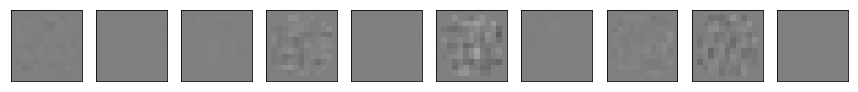

In [25]:
patches_rec = sparse_code_rec @ dico.dictionary
error = patches_bar - patches_rec
fig, axs = show_data(patches_bar[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(patches_rec[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
print('average of data patches = ', patches_bar.mean(), '+/-', patches_bar.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(patches_bar**2, axis=1))
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
print('gain of average coding = ', SD.mean()/SE.mean())

In [26]:
SD = np.sqrt(np.mean(patches_bar**2, axis=1))

record = pd.DataFrame({'gain':[SD.mean()/SE.mean()],
                               'aerror':[np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=['homeo'])

record

,aerror,gain,perror,perror_high
homeo,0.839041,3.070501,0.705387,0.959804


## comparing to the learning without homeostasis

Extracting data..loading the data called : data_cache/autoencoder_data
Data is of shape : (81920, 169) - done in 0.30s.
loading the dico called : data_cache/autoencoder_None_dico.pkl


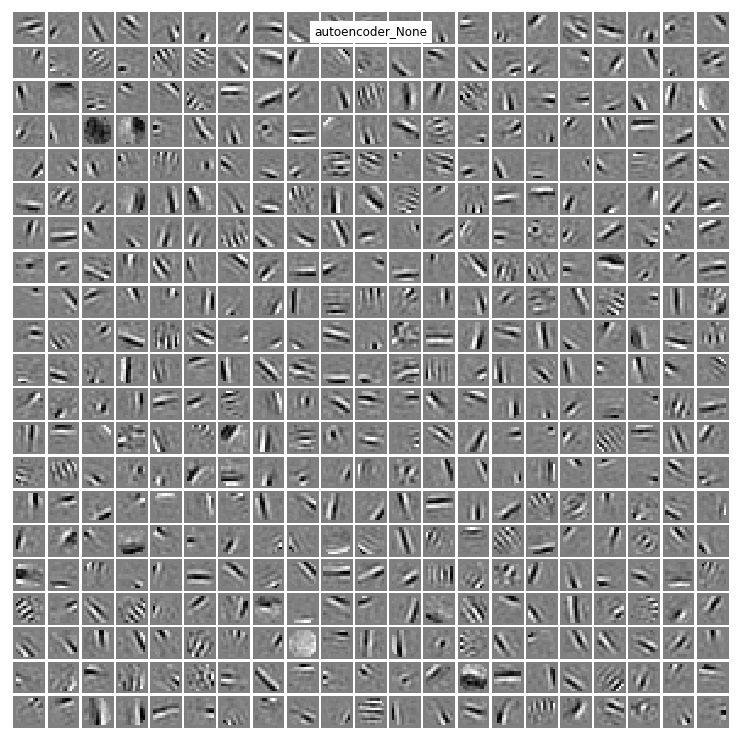

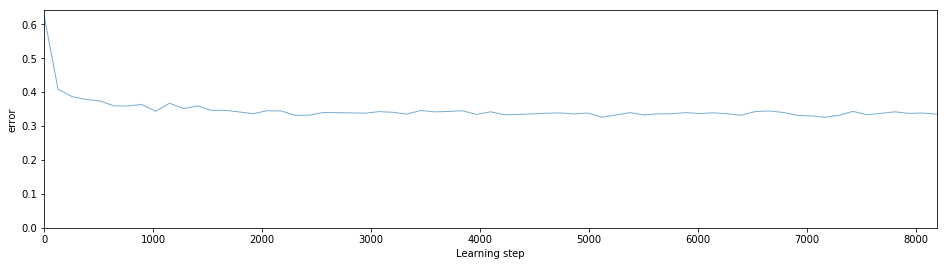

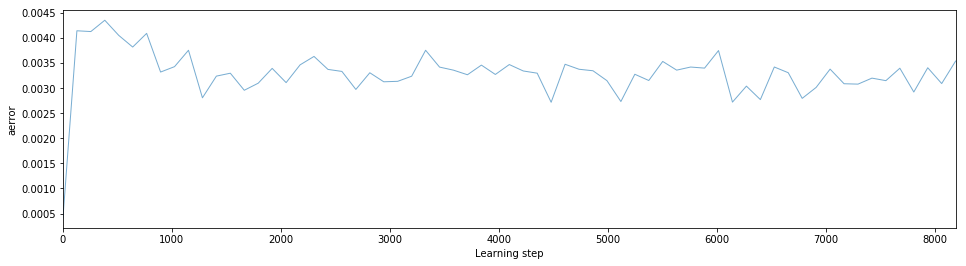

In [27]:
homeo_method = 'None'
matname = 'autoencoder_' + homeo_method
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl_nohomeo = SHL(**opts)
data = shl_nohomeo.get_data(matname='autoencoder')
dico_nohomeo = shl_nohomeo.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [28]:
if not dico_nohomeo.P_cum is None: 
    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(dico_nohomeo.P_cum, verbose=False, alpha=.15);
    ax.set_ylim(0.85, 1.01)
    #ax.set_xmargin(0.);

### coding


number of codes, size of codewords =  (2048, 441)
average of codewords =  0.005422679712987661
average std of codewords =  0.05319816659360602
l0-sparseness of codewords =  0.033926135558390025  ~= l0/M = 0.034013605442176874
std of the average of individual patches =  0.0013727713541320755
number of codes, size of reconstructed images =  (2048, 169)


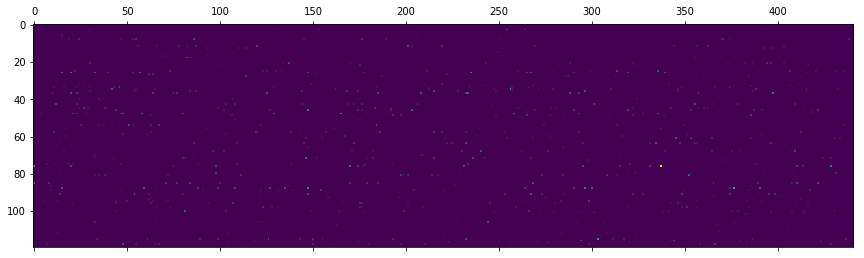

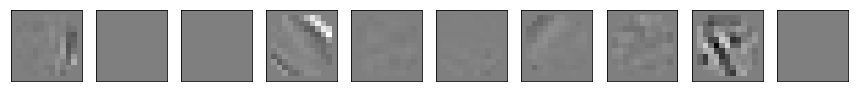

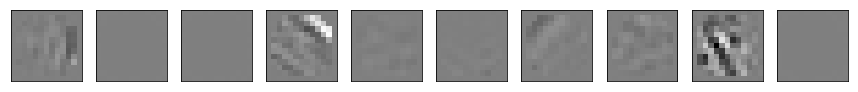

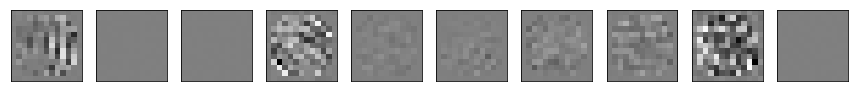

average of data patches =  -1.0042947495150989e-05 +/- 0.005973648630595939
average of residual patches =  7.803596390448593e-05 +/- 0.003042618996221927
median energy of data =  0.03022854521092207
average energy of data =  0.05903749734484456 +/- 0.07012868733999604
average energy of residual =  0.02028926249818388 +/- 0.023558803490106323
median energy of residual =  0.010714040421183738
average gain of coding =  3.08120286266265 +/- 0.8459767606284093


In [29]:
P_cum_rec = None # dico.P_cum
gain_rec = np.ones(shl_nohomeo.n_dictionary)

sparse_code = mp(data[indx, :], dico_nohomeo.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum_rec, gain=gain_rec)
patches = sparse_code @ dico_nohomeo.dictionary
error = data[indx, :] - patches

print('number of codes, size of codewords = ', sparse_code.shape)
print('average of codewords = ', sparse_code.mean())
print('average std of codewords = ', sparse_code.std())
print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl_nohomeo.l0_sparseness/shl_nohomeo.n_dictionary)
print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

print('number of codes, size of reconstructed images = ', patches.shape)

plt.matshow(sparse_code[:N_show, :])
plt.show()
fig, axs = show_data(data[indx, :][:max_patches, :])
plt.show()
fig, axs = show_data(patches[:max_patches, :])
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
plt.show()
print('average of data patches = ', data[indx, :].mean(), '+/-', data[indx, :].mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))

print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

### Generating and shuffling the coefficients

(2048, 441)


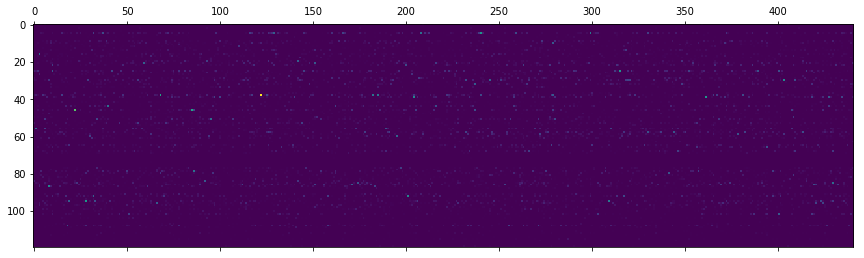

In [30]:
#sparse_code_bar = sparse_code.copy()
sparse_code_bar = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness_noise, 
                 P_cum=None, gain=np.ones(shl.n_dictionary))

np.random.shuffle(sparse_code_bar)

if do_double_shuffle:
    sparse_code_bar = sparse_code_bar.T
    np.random.shuffle(sparse_code_bar)
    sparse_code_bar = sparse_code_bar.T

print(sparse_code_bar.shape)
plt.matshow(sparse_code_bar[:N_show, :])

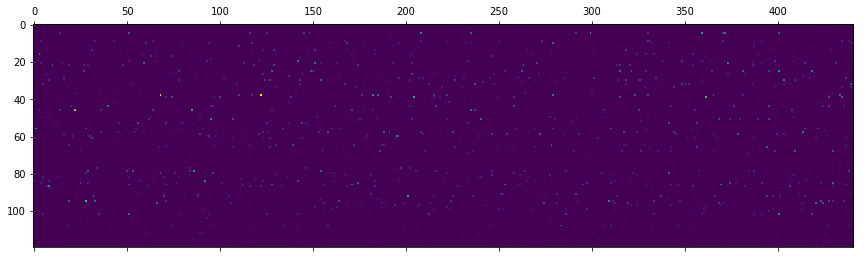

In [31]:
patches_bar = sparse_code_bar @ dico_nohomeo.dictionary
sparse_code_rec = mp(patches_bar, dico_nohomeo.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum_rec, gain=gain_rec)

plt.matshow(sparse_code_rec[:N_show, :])

In [32]:
print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_rec)))
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar-sparse_code_rec)))

mean deviation of coefficients =  0.005751707311536033
total deviation of coefficients =  0.012769233222302804


In [33]:
if dico_nohomeo.P_cum is None:
    from shl_scripts.shl_learn import get_P_cum
    dico_nohomeo.P_cum = get_P_cum(sparse_code_bar, C=C, nb_quant=nb_quant)
    
q_rec = quantile(dico_nohomeo.P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=False)
q_bar = quantile(dico_nohomeo.P_cum, rescaling(sparse_code_bar, C=C), stick, do_fast=False)

print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))

mean deviation of quantiles =  0.025151284635095774
mean deviation of quantiles =  0.004990003521919702
total deviation of quantiles =  0.02434851999043008
ratio deviation of quantiles =  0.9680825589502683


In [34]:
perror = np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
print('proba correct coefficients = ', perror)
#sparse_code_bar_high = threshold(sparse_code_bar, l0_sparseness) * sparse_code_bar
#sparse_code_rec_high = threshold(sparse_code_rec, l0_sparseness) * sparse_code_rec
#print('proba correct coefficients (high) = ', np.mean( (sparse_code_bar_high>0) == (sparse_code_rec_high>0)))      
perror_high = 1 - np.mean( threshold(sparse_code_bar, l0_sparseness) == (sparse_code_rec>0))
print('proba correct coefficients (strong) = ', perror_high)

proba correct coefficients =  0.6889582004676871
proba correct coefficients (strong) =  0.9476907950680272


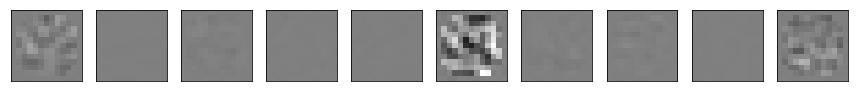

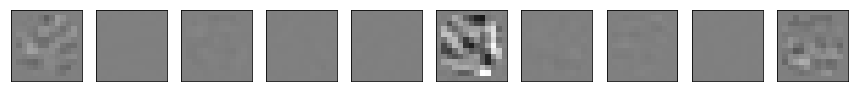

average of data patches =  9.249035141968696e-05 +/- 0.0061987202222292415
average of residual patches =  0.00011512846844042978 +/- 0.0027805415918299536
median energy of data =  0.03276988927645982
average energy of data =  0.06145463252166074 +/- 0.07303806409706648
average energy of residual =  0.0180306155074753 +/- 0.021415802612954424
median energy of residual =  0.009299531265543583
average gain of coding =  3.609918339125318 +/- 0.8659385915419082


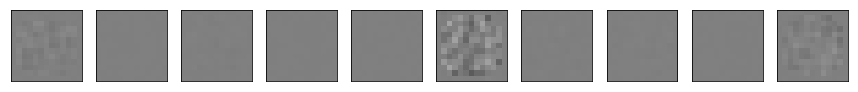

In [35]:
patches_rec = sparse_code_rec @ dico_nohomeo.dictionary
error = patches_bar - patches_rec
fig, axs = show_data(patches_bar[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(patches_rec[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
print('average of data patches = ', patches_bar.mean(), '+/-', patches_bar.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(patches_bar**2, axis=1))
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

In [36]:
SD = np.sqrt(np.mean(patches_bar**2, axis=1))

record = pd.concat([record, pd.DataFrame({'gain':[SD.mean()/SE.mean()],
                               'aerror':[np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        }, 
                                index=['nohomeo'])])
record

,aerror,gain,perror,perror_high
homeo,0.839041,3.070501,0.705387,0.959804
nohomeo,0.968083,3.408349,0.688958,0.947691


## Version used

In [37]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
pandas 0.22.0
Tue Feb 13 16:19:35 2018 CET